<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DataScience/210203_Support_Vector_Machine_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#210203 Support Vector Machine

이진분류 모델 중 하나인 Support Vector Machine에 대해 알아보고자 한다.
간단한 수학적 배경과 코드의 예시, 그리고 SVM만으로는 부족한 이유에 대해 알아보도록 하자.

## 1. 퍼셉트론에서 SVM까지

이진 분류의 시작은 퍼셉트론이다. 퍼셉트론은 간단하게 알고리즘의 원리에 대해서만 알아보려고 한다.

퍼셉트론의 목적은 이진 분류 문제에서 주어진 집단을 잘 이진 분류 시킬 수 있는 '초평면'을 찾는 것이 목적이다.

이는, 간단한 원리로 구성되는게, 맞게 분류된 애는 놔두고, 잘못 분류된 애들에 대해 가중치를 부여하여 올바른 곳으로 분류될 수 있도록 평면을 잘 이동시켜 최대한 오류를 적게 하는 것이 목표다.



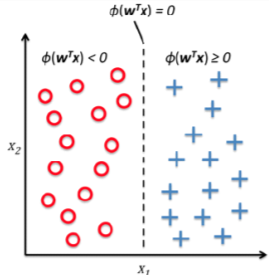

이렇게 나뉠 수 있는 $\phi$로 표현되는 초평면(혹은 에러가 가장 적게)을 찾아내는 것이 목표이다.  그런데 조금만 생각해보면 **이러한 초평면이 유일하다는 보장이 없다. 유일성을 어떻게 보장해줄까? 거리 조건을 부여하면 된다.**  즉  SVM은 Perceptron에 제한 조건을 부여한 모델이다.

## 2. SVM에 대한 개요
먼저 그림을 통해 내용을 요약하려고 한다.

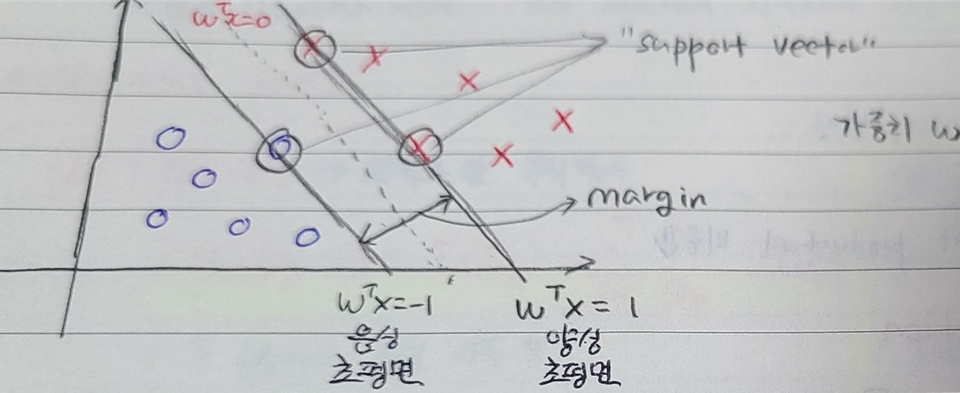

먼저 support vector란, **클래스를 구분하는 초평면과 가장 가까운 sample**들을 뜻한다.
여기서 
$$ w^{T}x <= -1$$ 은 음성초평면,
$$ w^{T}x >= 1$$ 은 양성초평면 쪽으로 분류될 것을 알 수 있다.

따라서 그 중간인
$$ w^{T}x = 0 $$이 결정 결계가 될 것이다.

다음 margin은 음성초평면과 양성 초평면 사이의 거리이다.

우리는 여기서 margin을 최대한 크게 하고 싶다. 만일, Margin이 너무 크다면 underfitting이 발생할 것이고, Margin이 너무 크다면 너무나 많은 Outlier을 고려하게 되어 Overfitting이 발생하게 될 것이다. 즉** 허용 가능한 수치 내에서 최대 마진을 계산해야 할 것이다.**

이름 그림으로 정리하면 다음과 같다.



그럼 대체 마진은 수식으로 어떻게 표현될 것인가?

이를 위해서는 양성 초평면 경계와 음수 초평면 경계의 거리를 확인해야 할 것이다.

- 양성 경계 : $w_{0}+w^{T}\cdot x_{+} = 1 $
- 음성 경계 : $w_{0}+w^{T}\cdot x_{-} = -1 $

이 두개의 차이가 마짐이 될 것이다. 이를 정리하여 정규화하면

Margin = $ \frac{2}{||w||}$ 에 대한 최대화를 고려하면 되는 것이다.

## 3. scikit-learn을 통한 SVM의 구현

예시 데이터 셋을 통해 SVM을 어떻게 사용하는지 알아보자.
코드는 데이터사이언스스쿨 내용을 통해 확인하였다.
https://datascienceschool.net/03%20machine%20learning/13.02%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html#scikit-learn

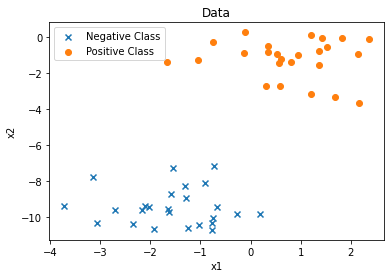

In [9]:
# Data Set 준비

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1, random_state=2)
y = 2 * y -  1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='x', label="Negative Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='o', label="Positive Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Data")
plt.show()

In [14]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1e7).fit(X, y)

# 여기 들어갈 수 있는 변수는 SVC(kernel = ?,  C= ?)  # 커널 지정, 슬랙변수 지정
# 링크에서 참조한 샘플로 시각화를 진행하려고 한다. (테스트는 제외)

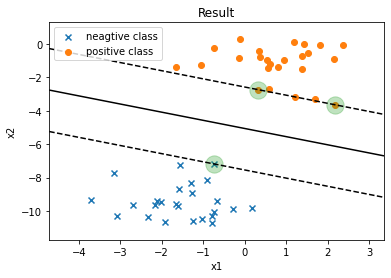

In [19]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin-1, xmax+1, 10)
yy = np.linspace(ymin-1, ymax+1, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='x', label="neagtive class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='o', label="positive class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Result")

plt.show()

## 4. 선형 데이터가 아닐 경우?
선형 데이터가 아닐 경우, SVM 그 자체로는 구분이 어려울 수 있는데 아래의 방법으로 이를 극복할 수 있다.

- Kernel SVM의 도입
- 슬랙 변수의 도입 : 경계 조건을 완화시켜 약간의 오차를 감수하고서라도 비선형 모델에서 수렴을 시키려고 하는 방법이다.  즉, 매우 작은 값을 더하거나 빼서, 경계의 기준을 완화시키는 것이다.

이 중, Kernel SVM 대한 방법은 개인적으로 정리 후 SVM 2편에서 다뤄보고자 한다.